# Customer Churn Prediction


### Importing Necessary Libraries


In [124]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Reading Data and Overview


In [126]:
# View the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Cleaning + EDA


In [127]:
# to let pandas display all columns
pd.options.display.max_columns = None

In [128]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [130]:
# Get the shape of the dataset
print(df.shape)

(7043, 21)


In [131]:
# checking for duplicates
df.duplicated().sum()

0

In [132]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [133]:
# removing the customerID column
df = df.drop(["customerID"], axis=1)

In [134]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [135]:
# checking where TotalCharges is ' ' (empty space)
df[df["TotalCharges"] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [136]:
# fixing TotalCharges column datatype and ' ' (empty space) values
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0).astype(float)

In [137]:
df[df["TotalCharges"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [138]:
df[df["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


### Quick EDA Overview


In [139]:
df.select_dtypes("number").describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [140]:
df.select_dtypes("object").describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [141]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

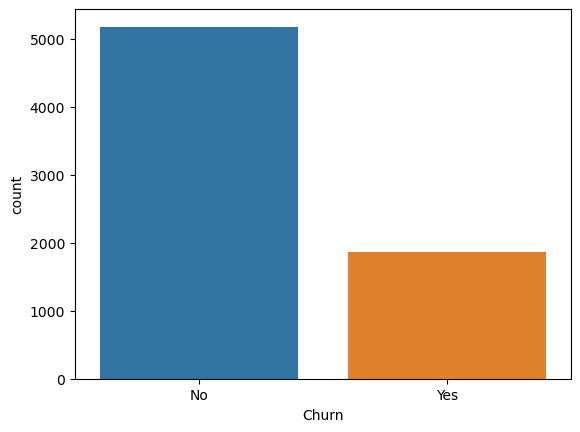

In [142]:
sns.countplot(data=df, x="Churn", hue="Churn")

In [143]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

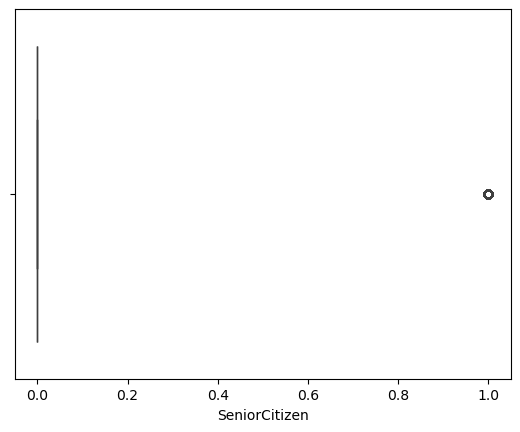

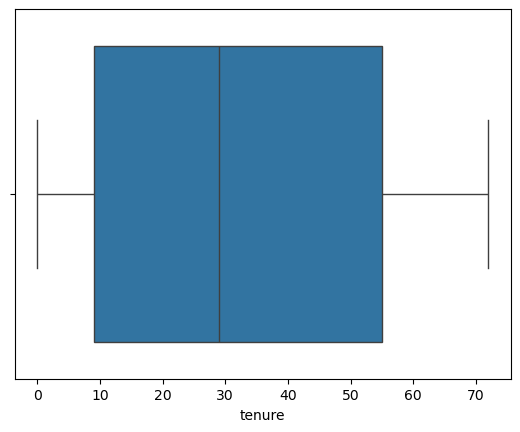

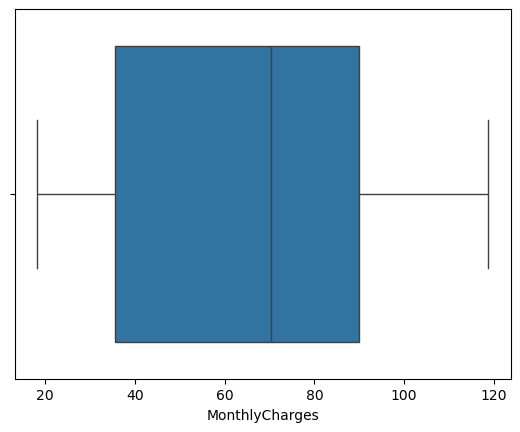

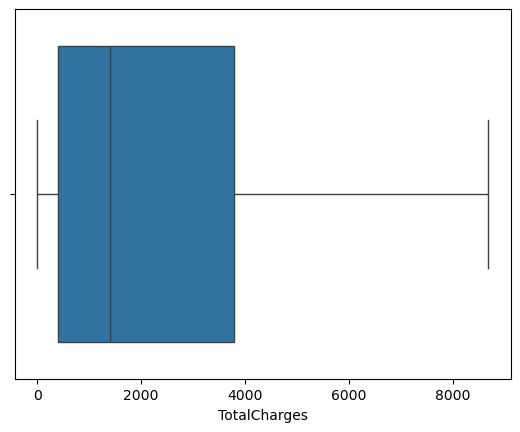

In [144]:
# Checking for Outliers in Numerical features
for col in df.select_dtypes("number").columns:

    plt.figure()

    sns.boxplot(data=df, x=df[col])

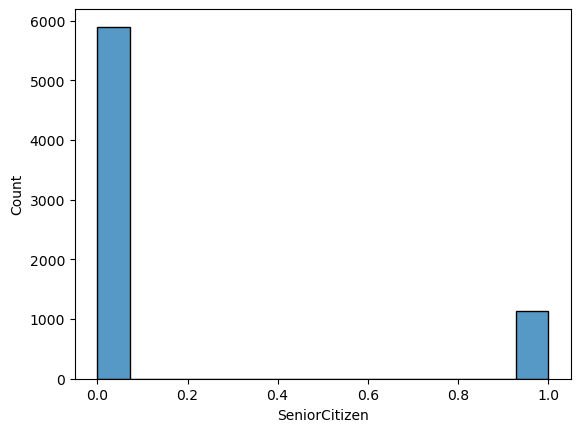

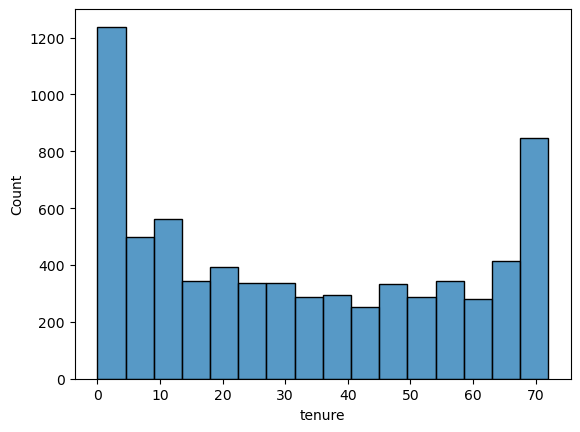

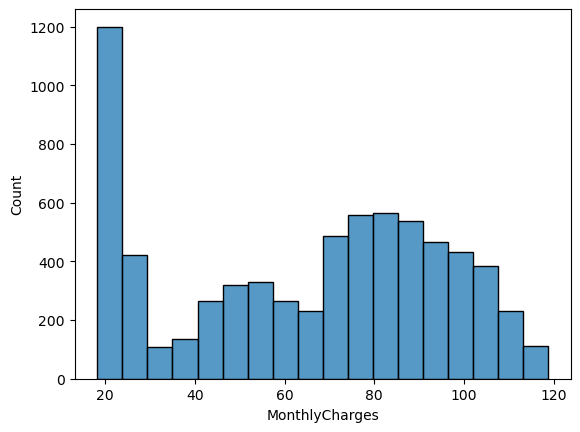

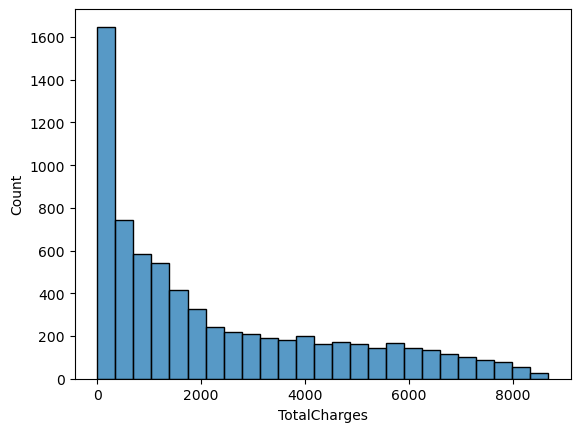

In [145]:
# Distribution of Numerical features
for col in df.select_dtypes("number").columns:

    plt.figure()

    sns.histplot(data=df, x=df[col])

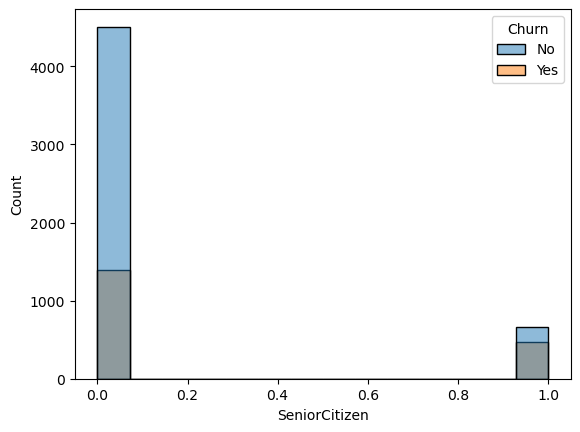

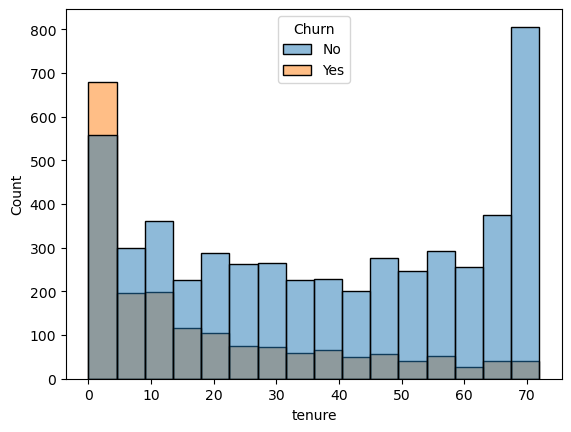

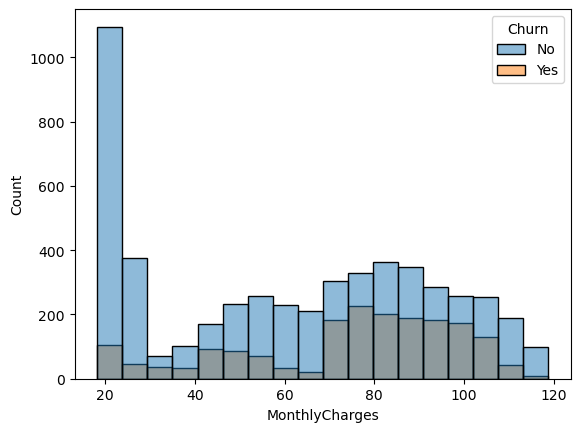

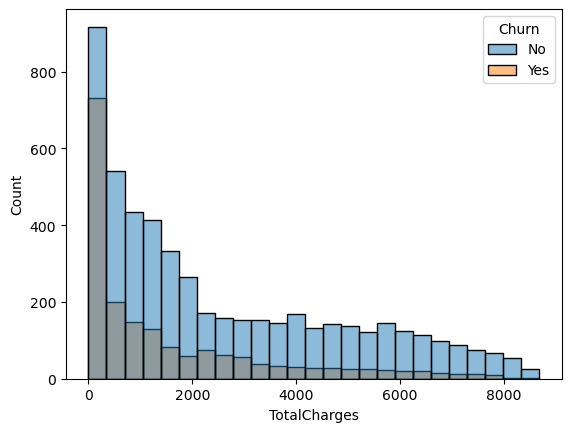

In [146]:
# Distribution of Numerical features with target
for col in df.select_dtypes("number").columns:

    plt.figure()

    sns.histplot(data=df, x=df[col], hue="Churn")

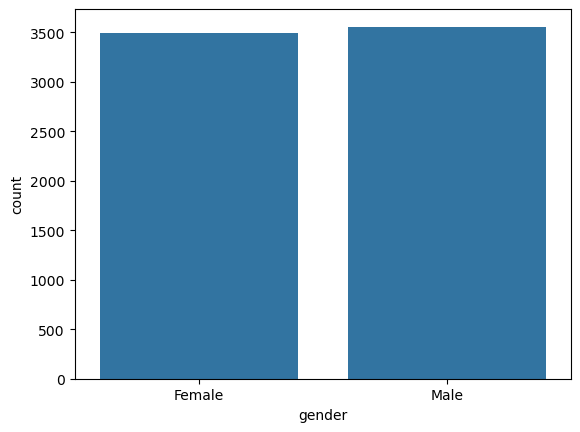

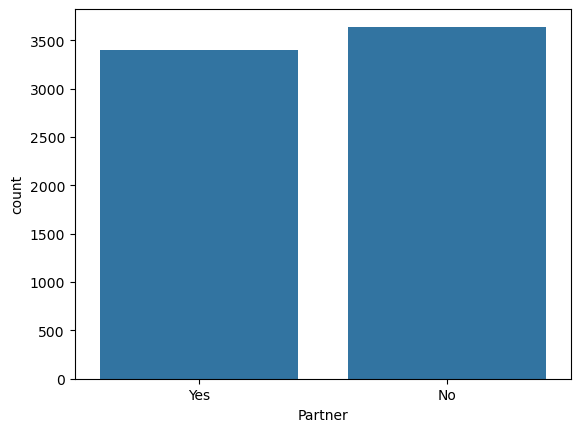

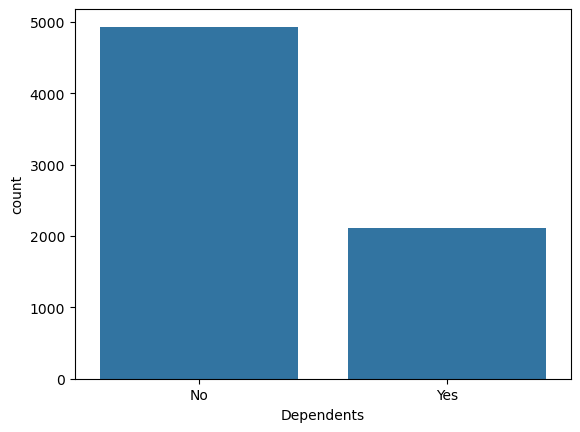

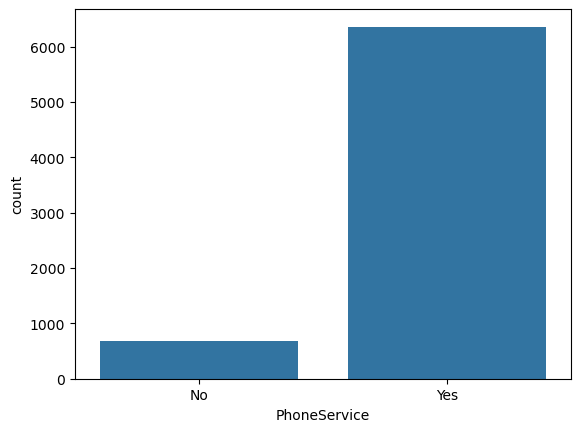

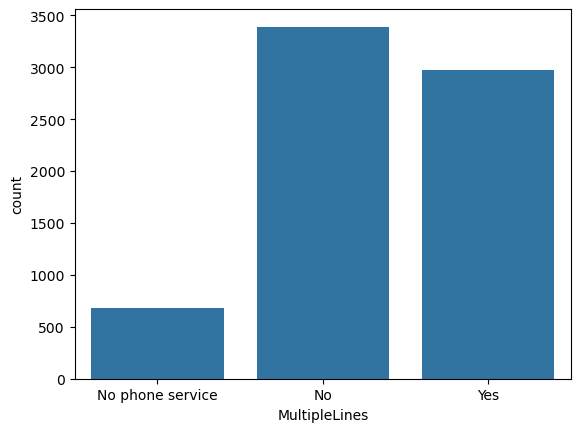

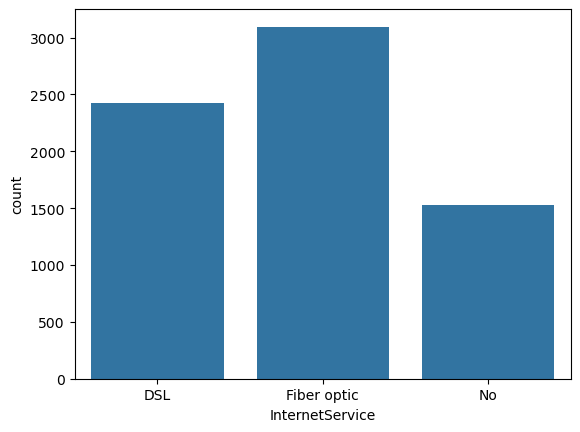

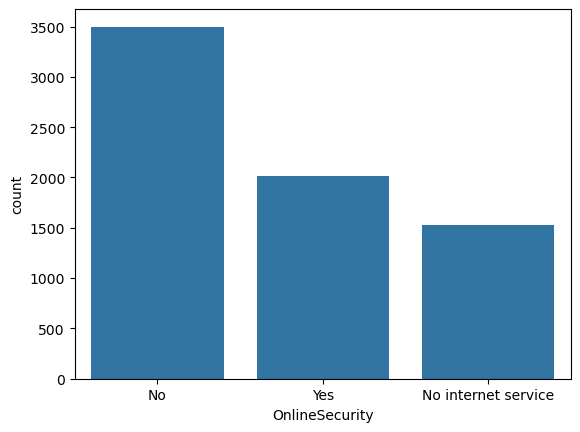

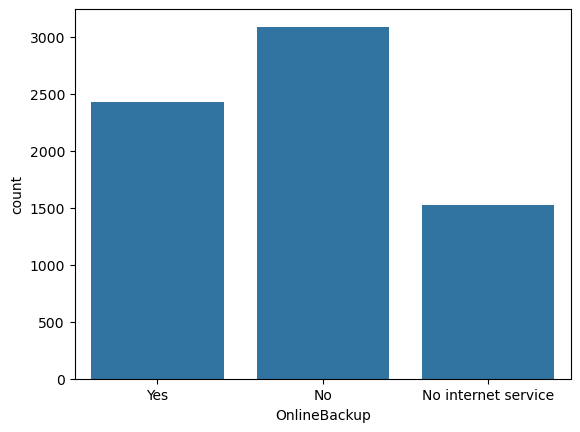

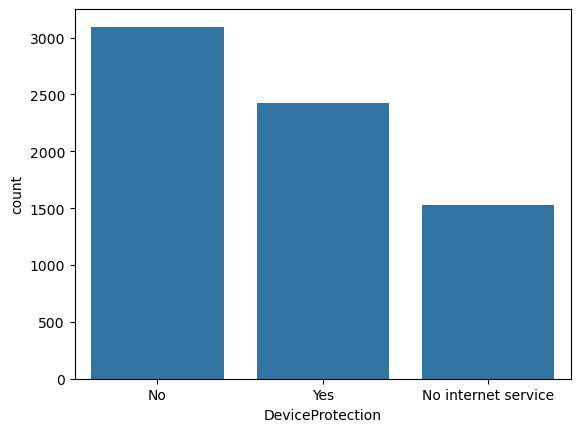

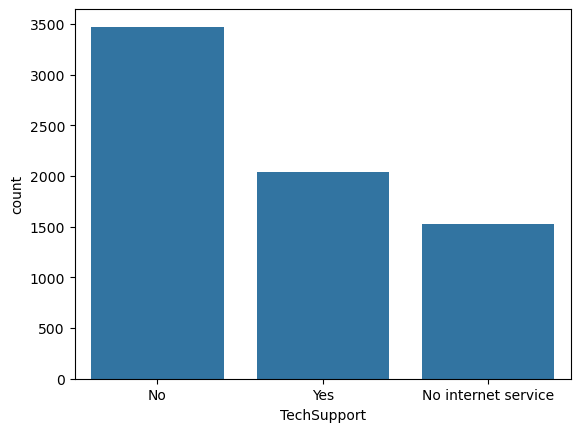

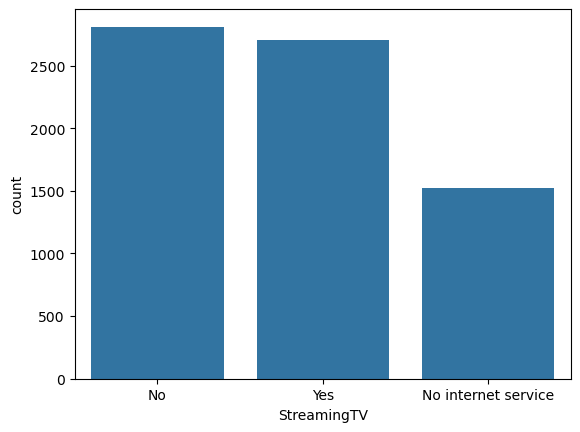

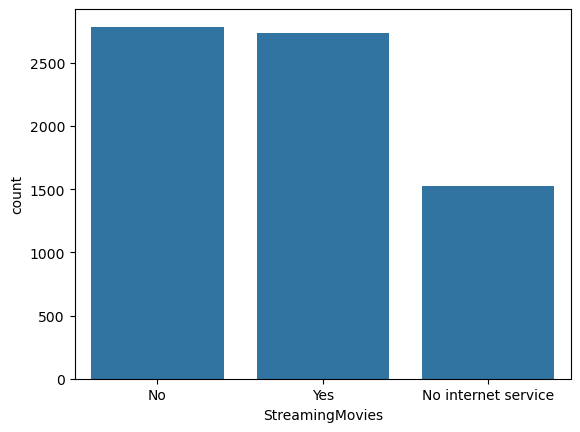

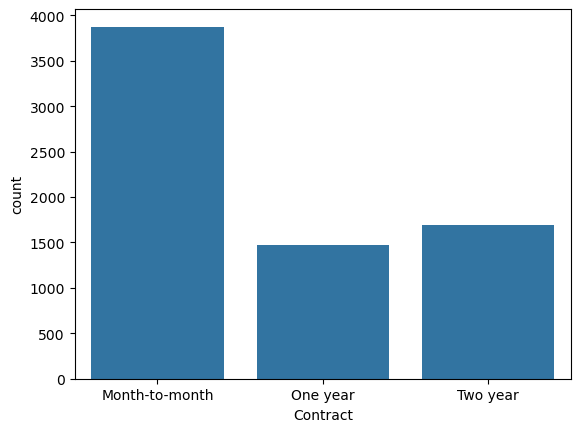

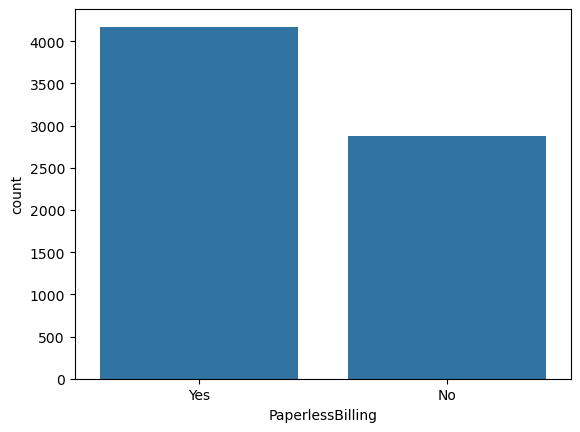

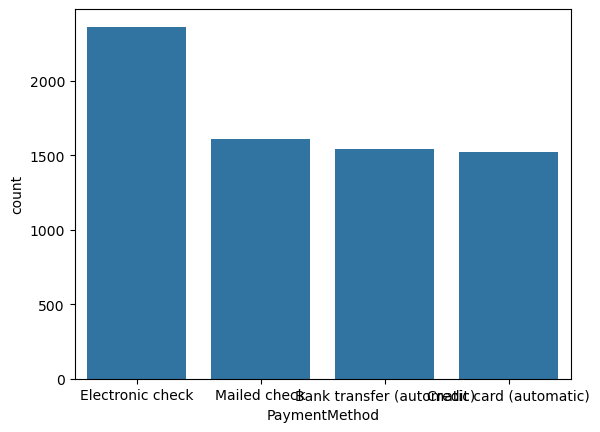

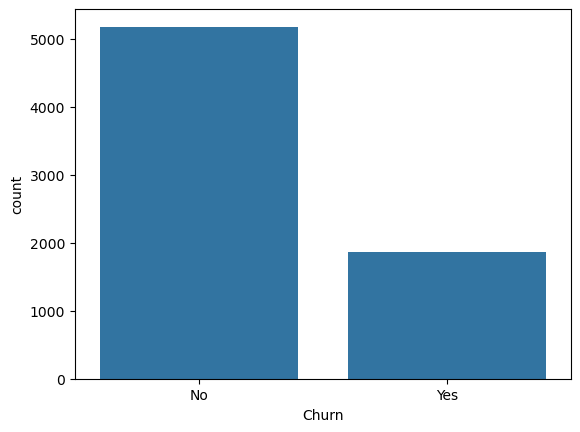

In [147]:
# Dist of Categorical features
for col in df.select_dtypes("object").columns:

    plt.figure()

    sns.countplot(data=df, x=df[col])

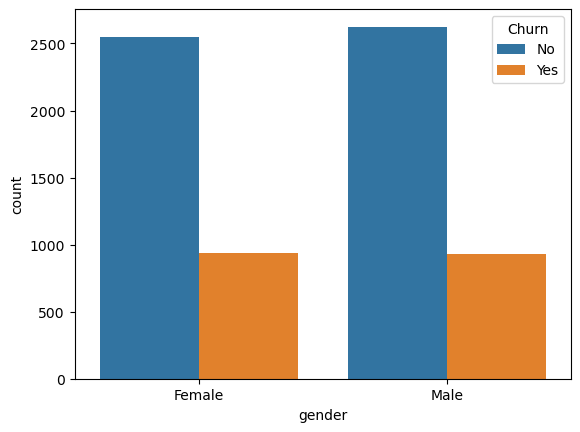

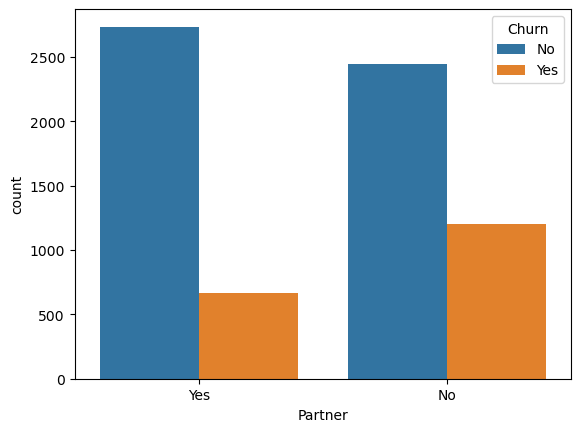

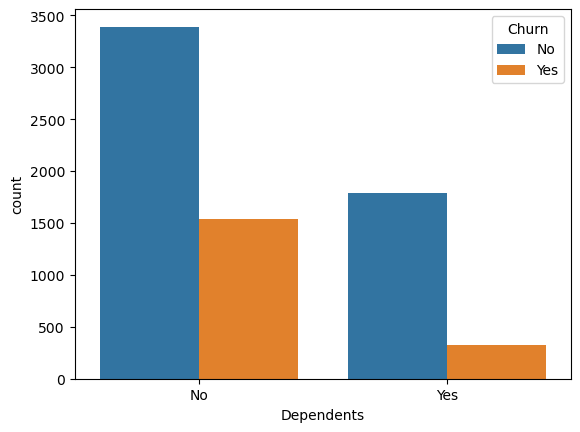

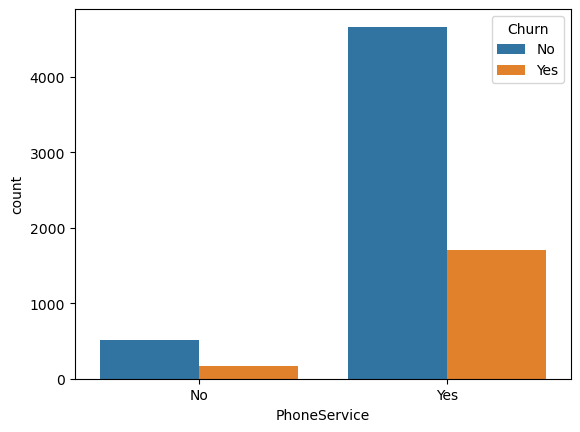

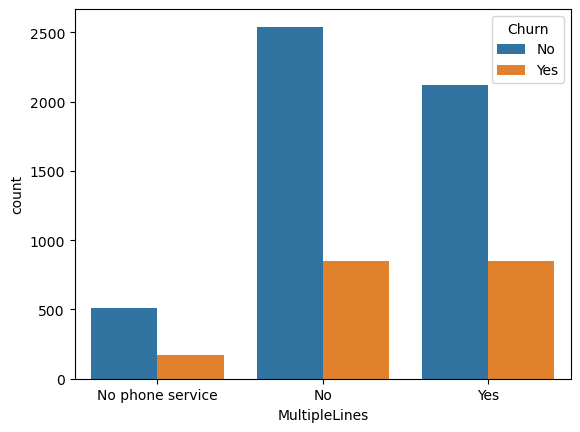

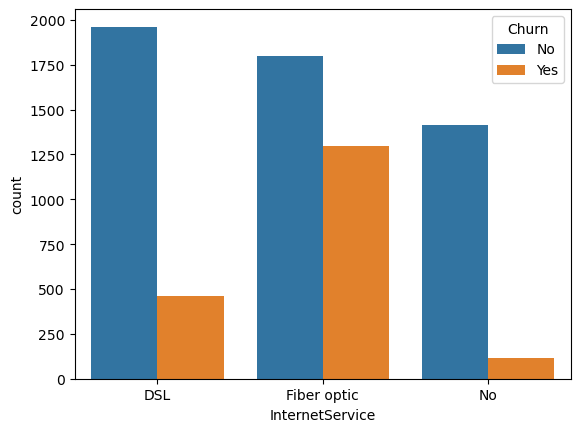

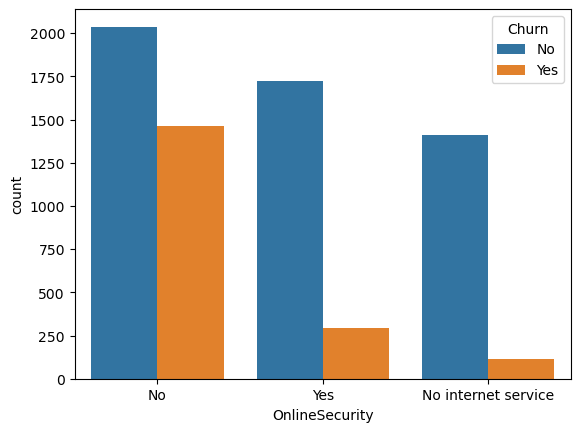

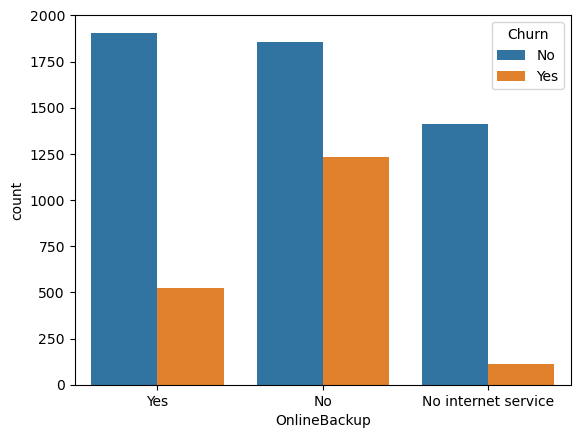

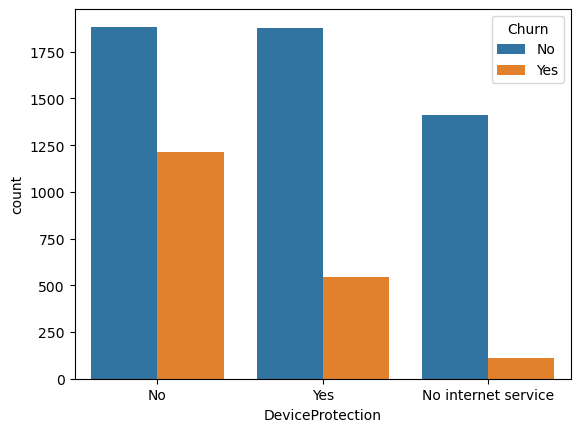

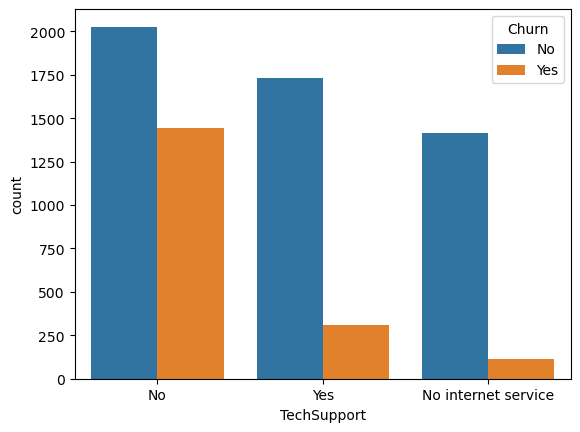

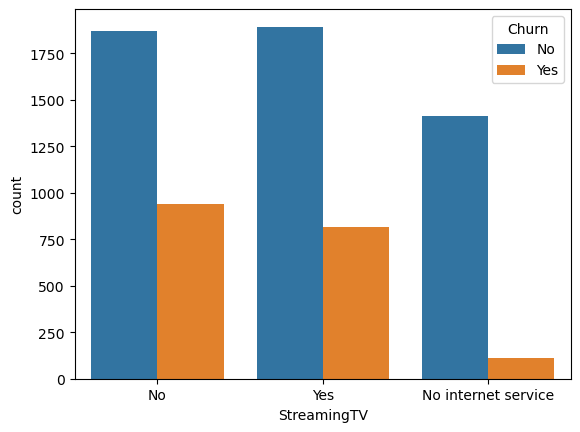

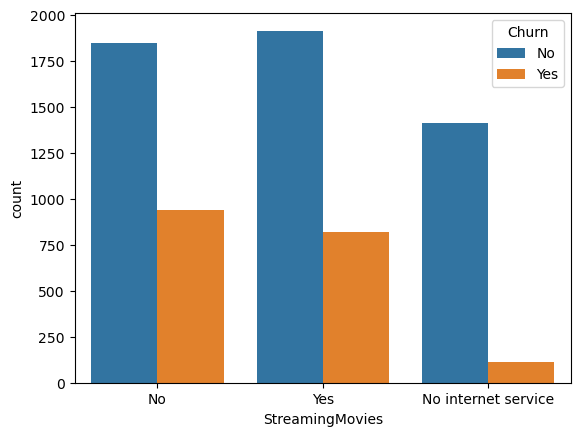

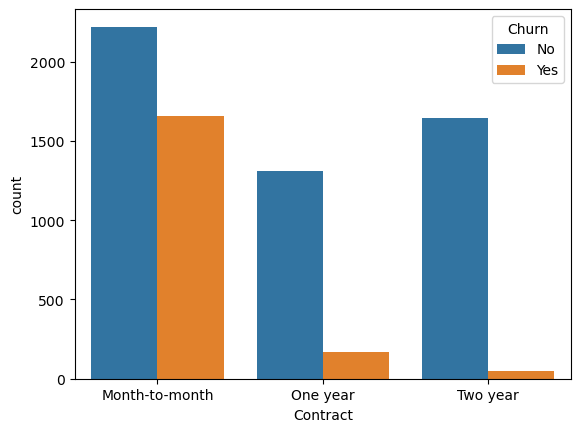

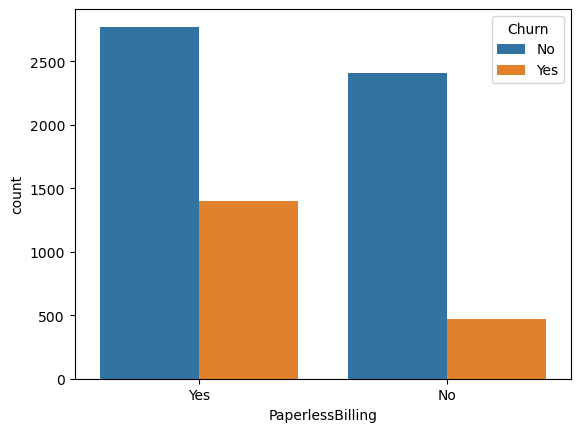

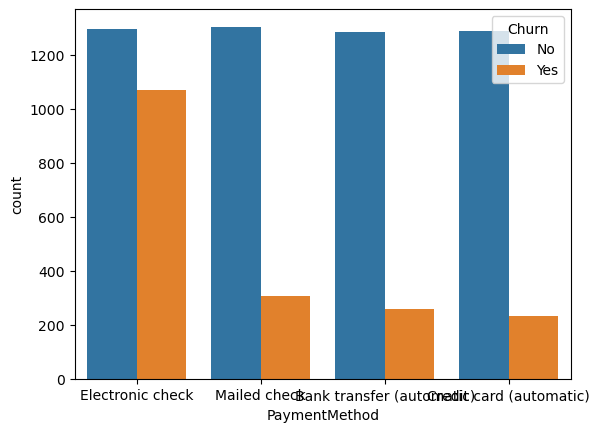

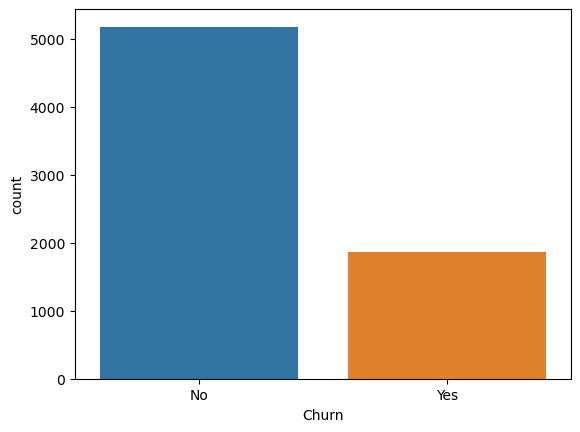

In [148]:
# Dist of Categorical features with target
for col in df.select_dtypes("object").columns:

    plt.figure()

    sns.countplot(data=df, x=df[col], hue="Churn")

In [149]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

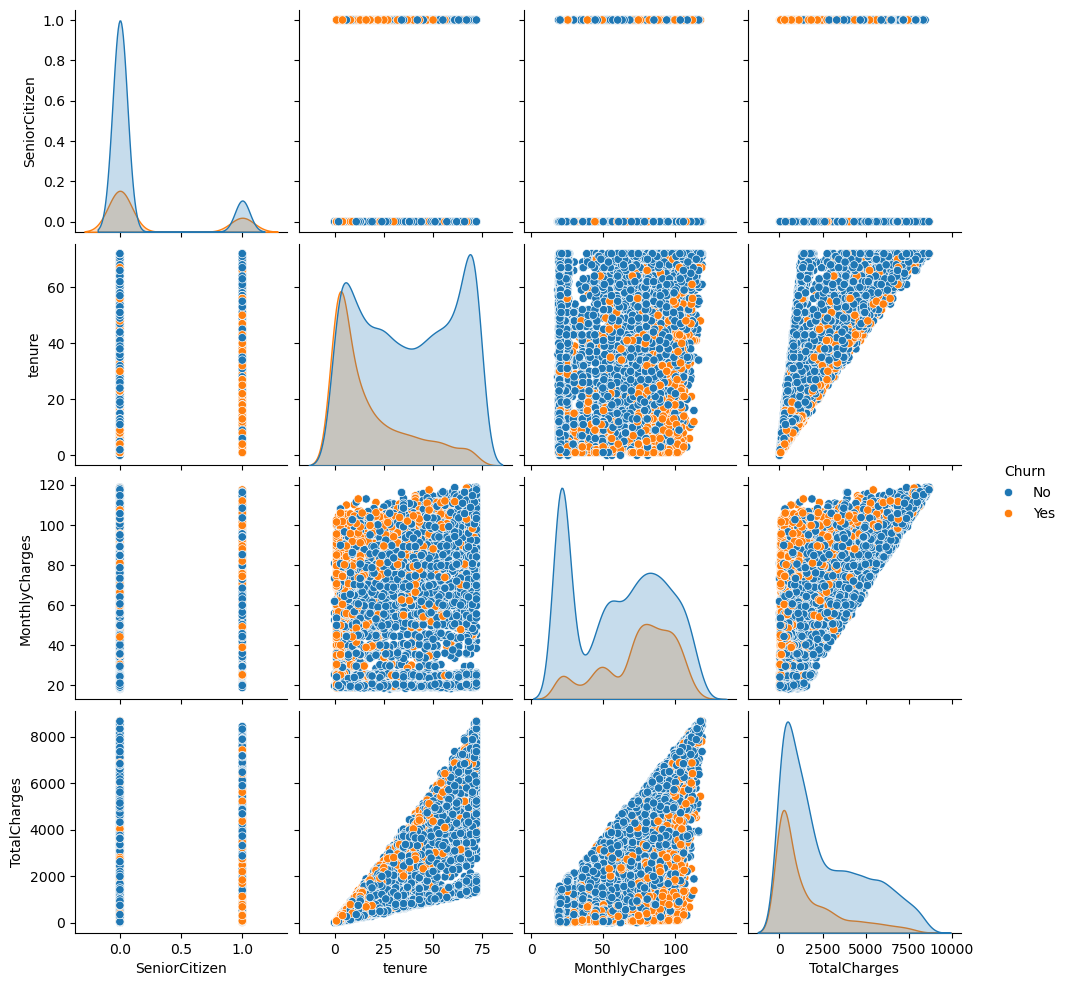

In [150]:
# Pairplotting all features with target
sns.pairplot(data=df, hue="Churn")

<Axes: >

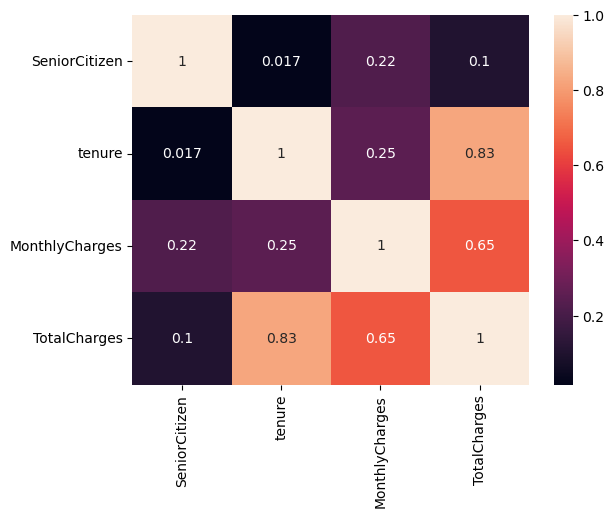

In [151]:
# checking correlation between all features
sns.heatmap(df.select_dtypes("number").corr(), annot=True)

In [152]:
for col in df.select_dtypes("object").columns:
    print(f"""{df[col].value_counts()}""")
    print("*" * 50)

gender
Male      3555
Female    3488
Name: count, dtype: int64
**************************************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
**************************************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
**************************************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
**************************************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
**************************************************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
**************************************************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
**************************************************
OnlineBackup
No                     3088
Yes            

In [244]:
import os

try:
    # Check if the file already exists
    if os.path.exists("cleaned_df.csv"):
        print("The file 'cleaned_df.csv' already exists.")
    else:
        # Save the DataFrame to a CSV file if it doesn't exist
        df.to_csv("cleaned_df.csv", index=False)
        print("DataFrame saved as 'cleaned_df.csv'.")
except Exception as e:
    print(f"An error occurred while saving the DataFrame: {e}")

DataFrame saved as 'cleaned_df.csv'.


### Preprocessing & Modeling


#### Importing ML Libraries


In [153]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
from sklearn.model_selection import (
    cross_validate,
    GridSearchCV,
    StratifiedKFold,
    cross_val_predict,
    RandomizedSearchCV,
)

#### Preprocessing


In [154]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [155]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [156]:
for col in df.select_dtypes("object").columns:
    print(f"{col} -- {df[col].nunique()}")

gender -- 2
Partner -- 2
Dependents -- 2
PhoneService -- 2
MultipleLines -- 3
InternetService -- 3
OnlineSecurity -- 3
OnlineBackup -- 3
DeviceProtection -- 3
TechSupport -- 3
StreamingTV -- 3
StreamingMovies -- 3
Contract -- 3
PaperlessBilling -- 2
PaymentMethod -- 4


In [157]:
df.select_dtypes("object").columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [158]:
x, y = df.drop(["Churn"], axis=1), df["Churn"]

In [159]:
cat_ohe_pl = make_pipeline(OneHotEncoder(sparse_output=False, drop="first"))

In [160]:
cat_preprocessing = ColumnTransformer(
    transformers=[
        (
            "cat_ohe_pl",
            cat_ohe_pl,
            [
                "gender",
                "Partner",
                "Dependents",
                "PhoneService",
                "MultipleLines",
                "InternetService",
                "OnlineSecurity",
                "OnlineBackup",
                "DeviceProtection",
                "TechSupport",
                "StreamingTV",
                "StreamingMovies",
                "Contract",
                "PaperlessBilling",
                "PaymentMethod",
            ],
        )
    ],
    remainder="passthrough",
)
cat_preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_ohe_pl',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [161]:
cat_preprocessing.fit_transform(X=x.select_dtypes("object"))

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [162]:
# pl = ImbPipeline(
#     [
#         ("cat_preprocessing", cat_preprocessing),
#         ("smote_tomek", SMOTETomek()),
#         ("scaler", StandardScaler()),
#     ]
# )
# pl

In [163]:
models_initial = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(
        verbose=0  # verbose=0 so that we won't see progress updates, and the training process will be silent.
    ),
    # Multi-Layer Perceptron Classifier
    MLPClassifier(
        hidden_layer_sizes=(100,),  # Number of neurons in hidden layers
        max_iter=1000,  # Maximum number of iterations for convergence (300 was not enough for convergance)
        random_state=42,  # int for reproducible results across multiple function calls
    ),
]

LogisticRegression
Train recall score: 0.7546500380028845
Test recall score: 0.7539398711207175
**************************************************
KNeighborsClassifier
Train recall score: 0.7880520064672625
Test recall score: 0.6988487160461965
**************************************************
GaussianNB
Train recall score: 0.6747835977471045
Test recall score: 0.6724383427963094
**************************************************
SVC
Train recall score: 0.809882268228864
Test recall score: 0.7803508492483384
**************************************************
DecisionTreeClassifier
Train recall score: 0.9628353333276637
Test recall score: 0.7299455811665269
**************************************************
RandomForestClassifier
Train recall score: 0.965497740143425
Test recall score: 0.789722018356023
**************************************************
XGBClassifier
Train recall score: 0.916335677763257
Test recall score: 0.7833334005419704
********************************************

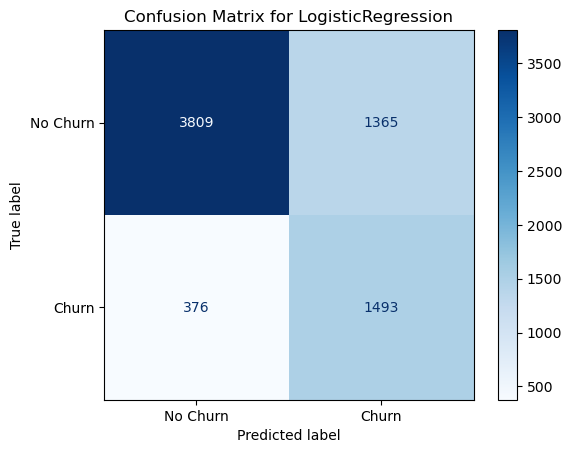

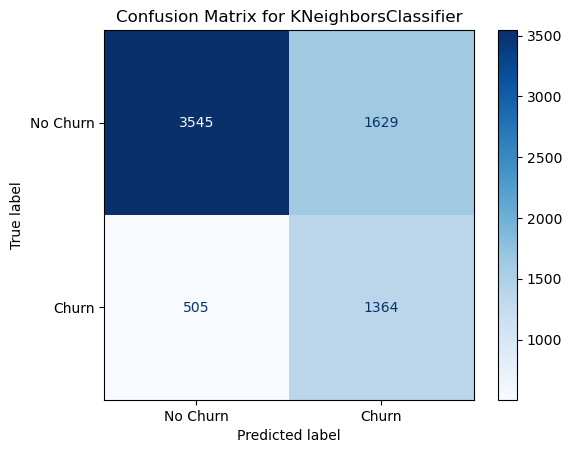

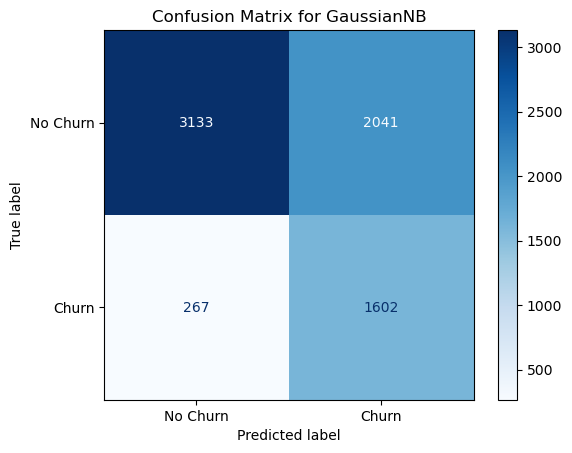

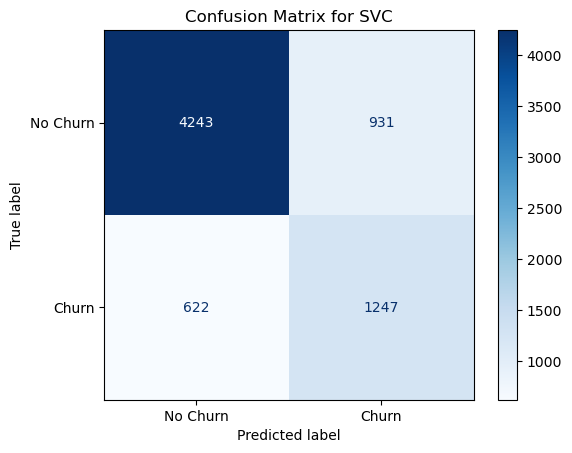

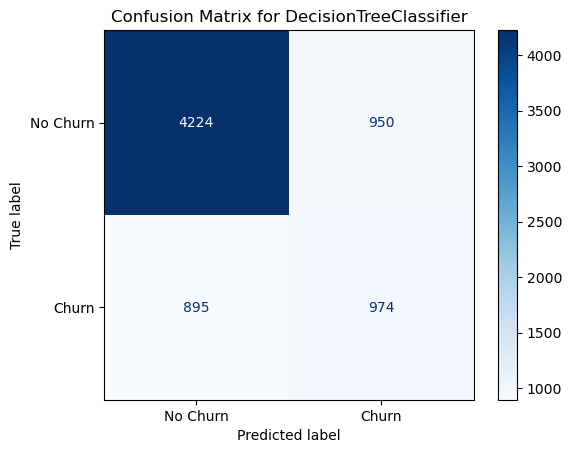

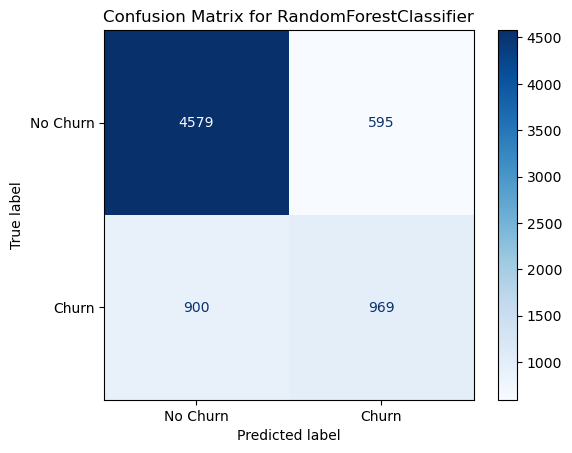

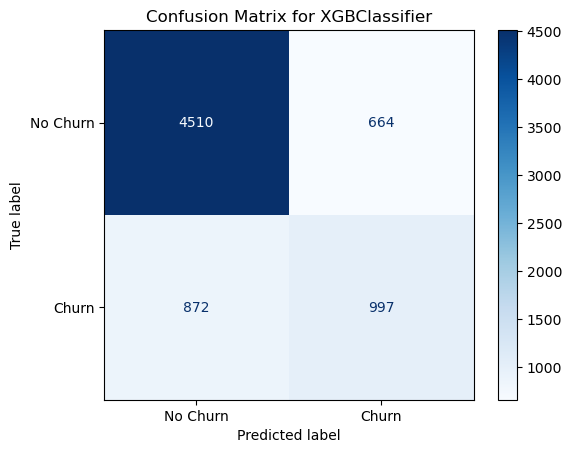

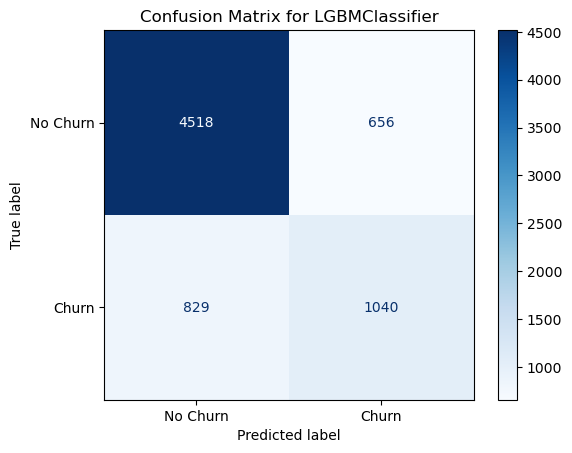

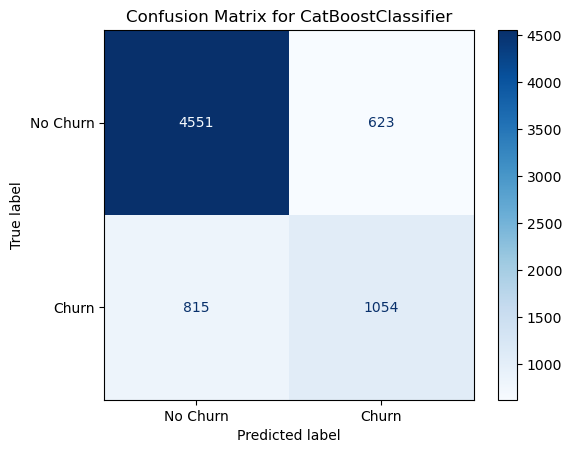

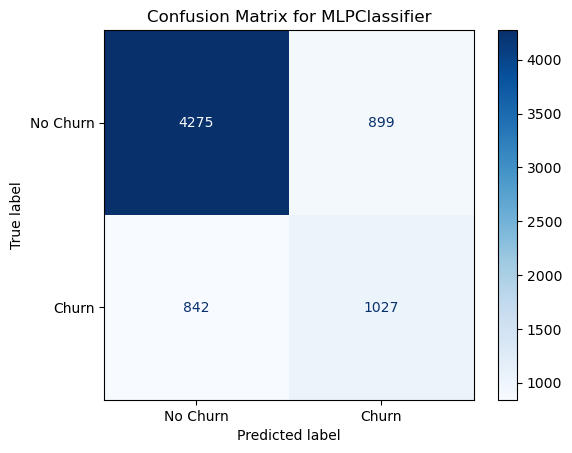

In [ ]:
# loop with all models initial results and confusion matrix
for model in models_initial:

    pl = ImbPipeline(
        [
            ("cat_preprocessing", cat_preprocessing),
            ("Smotetomek", SMOTETomek()),
            ("Scaler", StandardScaler()),
            ("model", model),
        ]
    )

    scores = cross_validate(
        estimator=pl,
        X=x,
        y=y,
        cv=StratifiedKFold(n_splits=5),
        scoring="recall_weighted",
        return_train_score=True,
    )

    print(f"{model.__class__.__name__}")

    print(f'Train recall score: {scores["train_score"].mean()}')

    print(f'Test recall score: {scores["test_score"].mean()}')

    y_pred = cross_val_predict(pl, X=x, y=y, cv=StratifiedKFold(n_splits=5))

    cm = confusion_matrix(y, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=["No Churn", "Churn"]
    )

    disp.plot(cmap="Blues")

    disp.ax_.set_title(f"Confusion Matrix for {model.__class__.__name__}")

    print("*" * 50)

### Tunning Models


models to furthur tune

- LogisticRegression
- SVC
- RandomForestClassifier
- XGBClassifier (670 mins)


#### LogisticRegression


In [165]:
# logisticregression pipeline
pipeline_lr = ImbPipeline(
    [
        ("cat_preprocessing", cat_preprocessing),
        ("poly", PolynomialFeatures()),
        ("Smotetomek", SMOTETomek(random_state=42)),
        ("Scaler", StandardScaler()),
        ("logisticregression", LogisticRegression(max_iter=1000, solver="liblinear")),
    ]
)

In [166]:
params_lr = {
    "poly__degree": [1, 2, 3],  # higher degrees to capture more complex patterns
    "logisticregression__C": [
        0.1,
        1,
        10,
    ],  # Regulaization strength (smaller values mean stronger regulaization)
    "logisticregression__penalty": ["l1", "l2"],
}

In [167]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [168]:
grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=params_lr,
    cv=cv,
    scoring="recall_weighted",
    verbose=2,
    n_jobs=-1,
)
grid_search_lr.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('cat_preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_ohe_pl',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetS...
                                                                          'PaymentMethod'])])),
                                       ('poly', PolynomialFeatures()),
                                       ('Smotetomek',
                                        SMOTETomek(random_state=42)),
                                       ('Scaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'poly__degree': [1, 2, 3]},
             scoring='recall_weighted', verbose=2)

In [169]:
print("Best hyperparameters:", grid_search_lr.best_params_)
print("Best score:", grid_search_lr.best_score_)

Best hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'poly__degree': 2}
Best score: 0.7545034155429382


In [170]:
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(x)

#### SVC


In [187]:
# svc pipeline
pl_svc = ImbPipeline(
    [
        ("cat_preprocessing", cat_preprocessing),
        ("Smotetomek", SMOTETomek(random_state=42)),
        ("Scaler", StandardScaler()),
        ("svc", SVC()),
    ]
)

In [188]:
params_svc = {
    "svc__kernel": ["linear", "rbf", "poly"],
    "svc__C": [0.1, 1, 10],
    "svc__probability": [True, False],
}

In [189]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [190]:
grid_search_svc = GridSearchCV(
    estimator=pl_svc,
    param_grid=params_svc,
    cv=cv,
    scoring="recall_weighted",
    verbose=2,
    n_jobs=-1,
)
grid_search_svc.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('cat_preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_ohe_pl',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetS...
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('Smotetomek',
                                        SMOTETomek(random_state=42)),
                                       ('Scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf', 'poly'],
                         'svc__probability': [True, False]},
             scoring='recall_weighted', verbose=2)

In [191]:
print("Best hyperparameters:", grid_search_svc.best_params_)
print("Best score:", grid_search_svc.best_score_)

Best hyperparameters: {'svc__C': 1, 'svc__kernel': 'rbf', 'svc__probability': True}
Best score: 0.785746661074908


In [192]:
best_model_svc = grid_search_lr.best_estimator_
y_pred_svc = best_model_svc.predict(x)

#### RandomForestClassifier


In [231]:
pl_rf = ImbPipeline(
    [
        ("cat_preprocessing", cat_preprocessing),
        ("Smotetomek", SMOTETomek(random_state=42)),
        ("Scaler", StandardScaler()),
        ("rf", RandomForestClassifier()),
    ]
)

In [232]:
params_rf = {
    "rf__n_estimators": [50, 100, 200],
    "rf__max_depth": [None, 5, 10],
    "rf__min_samples_split": [2, 5, 10],
}

In [233]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [234]:
grid_search_rf = GridSearchCV(
    estimator=pl_rf,
    param_grid=params_rf,
    cv=cv,
    scoring="recall_weighted",
    verbose=2,
    n_jobs=-1,
)

In [235]:
grid_search_rf.fit(x, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('cat_preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_ohe_pl',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetS...
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('Smotetomek',
                                        SMOTETomek(random_state=42)),
                                       ('Scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='recall_weighted', verbose=2)

In [236]:
print("Best hyperparameters:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)

Best hyperparameters: {'rf__max_depth': None, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}
Best score: 0.7968220731982708


In [237]:
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(x)

#### XGBClassifier


In [214]:
xgb_model = XGBClassifier(
    tree_method="gpu_hist",  # Use GPU for training
    gpu_id=0,  # Specify GPU id (0 is the first GPU)
    n_jobs=-1,  # Use all CPU cores for parallel processing
)

In [215]:
pl_xgb = ImbPipeline(
    [
        ("cat_preprocessing", cat_preprocessing),
        ("Smotetomek", SMOTETomek(random_state=42)),
        ("Scaler", StandardScaler()),
        ("xgb", xgb_model),
    ]
)

In [216]:
params_xgb = {
    # Maximum depth of the tree: controls the complexity of the model
    "xgb__max_depth": [3, 5, 10],
    # Learning rate: controls how quickly the model learns from the data
    "xgb__learning_rate": [0.01, 0.1, 0.5],
    # Number of trees in the forest: controls the accuracy of the model
    "xgb__n_estimators": [50, 100, 200],
    # Gamma: controls the complexity of the model by penalizing large weights
    "xgb__gamma": [0, 0.1, 0.5],
    # Subsample: controls the proportion of data used for training each tree
    "xgb__subsample": [0.5, 0.8, 1],
    # Colsample_bytree: controls the proportion of features used for training each tree
    "xgb__colsample_bytree": [0.5, 0.8, 1],
    # Regularization strength: controls the complexity of the model
    "xgb__reg_alpha": [0, 0.1, 0.5],
    # Regularization strength: controls the complexity of the model
    "xgb__reg_lambda": [0, 0.1, 0.5],
}

In [219]:
cv = StratifiedKFold(n_splits=5)
grid_search_xgb = GridSearchCV(
    estimator=pl_xgb,
    param_grid=params_xgb,
    cv=cv,
    scoring="recall_weighted",
    verbose=2,
    n_jobs=-1,
)
grid_search_xgb.fit(x, y)

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits


c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(for

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('cat_preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_ohe_pl',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'Internet...
                                                      n_estimators=None,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.5, 0.8, 1],
                         'xgb__gamma': [0, 0.1, 0.5],
                         'xgb__learning_rate': [0.01, 0.1, 0.5],
                         'xgb__max_depth': [3, 5, 10],
                         'xgb__n_estimators': [50, 100, 200],
                         'xgb__reg_alpha': [0, 0.1, 0.5],
                         'xgb__reg_lambda': [0, 0.1, 0.5],
                         'xgb__subsample': [0.5, 0.8, 1]},
             scoring='recall_weighted', verbose=2)

In [ ]:
# training time 615 minutes

In [ ]:
print("Best hyperparameters:", grid_search_xgb.best_params_)
print("Best score:", grid_search_xgb.best_score_)
# Best hyperparameters: {'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 0.5, 'xgb__subsample': 1}
# Best score: 0.8017893291502677

Best hyperparameters: {'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 0.5, 'xgb__subsample': 1}
Best score: 0.8017893291502677


In [239]:
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(x)

In [240]:
grid_search_xgb.best_params_

{'xgb__colsample_bytree': 0.5,
 'xgb__gamma': 0,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 200,
 'xgb__reg_alpha': 0.1,
 'xgb__reg_lambda': 0.5,
 'xgb__subsample': 1}

In [241]:
grid_search_xgb.best_score_

0.8017893291502677

In [1]:
import joblib

In [ ]:
# joblib.dump(grid_search_xgb.best_estimator_, "model.h5")

NameError: name 'grid_search_xgb' is not defined

In [243]:
joblib.dump(x.columns, "dataFeature.h5")

['dataFeature.h5']

In [3]:
joblib.load("dataFeature.h5")

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')